<a href="https://colab.research.google.com/github/KusumaatmaSyafadhi/kusumaatmas/blob/main/0064_NYC_Property_Sales_Regretion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets was downloaded from: [https://www.kaggle.com/new-york-city/nyc-property-sales](https://)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition
 
#MODELLING
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


DATA SETS LOADING

In [3]:
jualan  = pd.read_csv("nyc-rolling-sales.csv")

DATA UNDERSTANDING

In [31]:
jualan.head(30)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,,10009.0,5.0,0.0,5.0,1633,6440,1900.0,2.0,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616,18690,1900.0,2.0,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212,7803,1900.0,2.0,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,,10009.0,10.0,0.0,10.0,2272,6794,1913.0,2.0,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,,10009.0,6.0,0.0,6.0,2369,4615,1900.0,2.0,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405.0,16.0,,C4,516 EAST 12TH STREET,,10009.0,20.0,0.0,20.0,2581,9730,1900.0,2.0,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406.0,32.0,,C4,210 AVENUE B,,10009.0,8.0,0.0,8.0,1750,4226,1920.0,2.0,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407.0,18.0,,C7,520 EAST 14TH STREET,,10009.0,44.0,2.0,46.0,5163,21007,1900.0,2.0,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379.0,34.0,,D5,141 AVENUE D,,10009.0,15.0,0.0,15.0,1534,9198,1920.0,2.0,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153.0,,D9,629 EAST 5TH STREET,,10009.0,24.0,0.0,24.0,4489,18523,1920.0,2.0,D9,16232000,2016-11-07 00:00:00


In [5]:
jualan.shape

(18762, 22)

In [6]:
jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18762 entries, 0 to 18761
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      18762 non-null  int64  
 1   BOROUGH                         18762 non-null  int64  
 2   NEIGHBORHOOD                    18762 non-null  object 
 3   BUILDING CLASS CATEGORY         18762 non-null  object 
 4   TAX CLASS AT PRESENT            18761 non-null  object 
 5   BLOCK                           18761 non-null  float64
 6   LOT                             18761 non-null  float64
 7   EASE-MENT                       18761 non-null  object 
 8   BUILDING CLASS AT PRESENT       18761 non-null  object 
 9   ADDRESS                         18761 non-null  object 
 10  APARTMENT NUMBER                18761 non-null  object 
 11  ZIP CODE                        18761 non-null  float64
 12  RESIDENTIAL UNITS               

In [7]:
jualan.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,18762.000000,18762.000000,18761.000000,18761.000000,18761.000000,18761.000000,18761.000000,18761.000000,18761.000000,18761.000000
mean,8939.582827,1.024304,1192.618037,732.696018,9926.700283,2.295880,0.293961,2.631256,1711.908267,2.106018
std,5397.961528,0.153997,760.615251,876.751081,1066.535475,21.969111,6.455786,23.025828,642.596054,0.570888
min,4.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4238.250000,1.000000,790.000000,29.000000,10013.000000,0.000000,0.000000,0.000000,1910.000000,2.000000
50%,8928.500000,1.000000,1179.000000,1002.000000,10022.000000,1.000000,0.000000,1.000000,1939.000000,2.000000
75%,13618.750000,1.000000,1491.000000,1203.000000,10029.000000,1.000000,0.000000,1.000000,1974.000000,2.000000
max,18309.000000,2.000000,5654.000000,9106.000000,10475.000000,1641.000000,422.000000,1653.000000,2017.000000,4.000000


In [8]:
jualan.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

I DROP SOME USELESS DATA HERE

In [211]:
jualan.drop(["Unnamed: 0","EASE-MENT", "ADDRESS", "APARTMENT NUMBER"],axis = 1, inplace = True)

In [212]:
jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18762 entries, 0 to 18761
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         18762 non-null  int64  
 1   NEIGHBORHOOD                    18762 non-null  object 
 2   BUILDING CLASS CATEGORY         18762 non-null  object 
 3   TAX CLASS AT PRESENT            18761 non-null  object 
 4   BLOCK                           18761 non-null  float64
 5   LOT                             18761 non-null  float64
 6   BUILDING CLASS AT PRESENT       18761 non-null  object 
 7   ZIP CODE                        18761 non-null  float64
 8   RESIDENTIAL UNITS               18761 non-null  float64
 9   COMMERCIAL UNITS                18761 non-null  float64
 10  TOTAL UNITS                     18761 non-null  float64
 11  LAND SQUARE FEET                18761 non-null  object 
 12  GROSS SQUARE FEET               

In [214]:
jualan.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,C2,10009.0,5.0,0.0,5.0,1633,6440,1900.0,2.0,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,C7,10009.0,28.0,3.0,31.0,4616,18690,1900.0,2.0,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,C7,10009.0,16.0,1.0,17.0,2212,7803,1900.0,2.0,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,C4,10009.0,10.0,0.0,10.0,2272,6794,1913.0,2.0,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,C2,10009.0,6.0,0.0,6.0,2369,4615,1900.0,2.0,C2,8000000,2016-11-17 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405.0,16.0,C4,10009.0,20.0,0.0,20.0,2581,9730,1900.0,2.0,C4,-,2017-07-20 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406.0,32.0,C4,10009.0,8.0,0.0,8.0,1750,4226,1920.0,2.0,C4,3192840,2016-09-23 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407.0,18.0,C7,10009.0,44.0,2.0,46.0,5163,21007,1900.0,2.0,C7,-,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379.0,34.0,D5,10009.0,15.0,0.0,15.0,1534,9198,1920.0,2.0,D5,-,2017-06-20 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153.0,D9,10009.0,24.0,0.0,24.0,4489,18523,1920.0,2.0,D9,16232000,2016-11-07 00:00:00


Data Preprocessing

In [215]:
jualan.drop_duplicates
jualan.shape

(18762, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


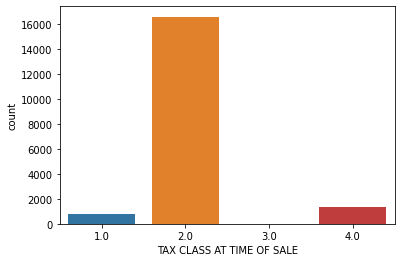

In [216]:
sns.countplot(jualan['TAX CLASS AT TIME OF SALE'])

OUTLIERS DETECTION

In [217]:
def outlier(sample):
  Q1=sample.quantile(0.25)
  Q3=sample.quantile(0.75)

  IQR=Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
  print("Number Of Outlier {}".format(number_outlier))

  if number_outlier>0:
    print("Outlier observation row: ")
  else:
    pass
  for i in range(len(sample)):
    if sample[i]<lower_range:
      print[i]
    elif sample[i]>upper_range:
      print(i)
    else:
      pass

In [ ]:
outlier(jualan['TOTAL UNITS']) #There are 1361 Outliers Here

In [220]:
jualan.loc[[18737,18738],"TOTAL UNITS"] #I Only check the outliers at those rows. Because it is way too many outliers here

18737    3.0
18738    3.0
Name: TOTAL UNITS, dtype: float64

In [ ]:
outlier(jualan['RESIDENTIAL UNITS']) #There are 1162 Outliers Here

In [222]:
jualan.loc[[18711,18712,18713,18714],"RESIDENTIAL UNITS"] #Same as above, I only check several rows that contain outliers.

18711    3.0
18712    3.0
18713    3.0
18714    3.0
Name: RESIDENTIAL UNITS, dtype: float64

In [ ]:
outlier(jualan['COMMERCIAL UNITS'])#There are 908 Outliers

In [224]:
jualan.loc[[1,2,7,18360,18361,18362,18363],"COMMERCIAL UNITS"]

1        3.0
2        1.0
7        2.0
18360    1.0
18361    1.0
18362    1.0
18363    2.0
Name: COMMERCIAL UNITS, dtype: float64

In [ ]:
outlier(jualan['LOT']) #There are 374 Outliers Here

In [226]:
jualan.loc[[7177,7178,7179],"LOT"]

7177    4027.0
7178    4069.0
7179    4071.0
Name: LOT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


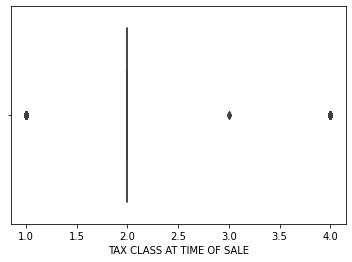

In [232]:
sns.boxplot(jualan['TAX CLASS AT TIME OF SALE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


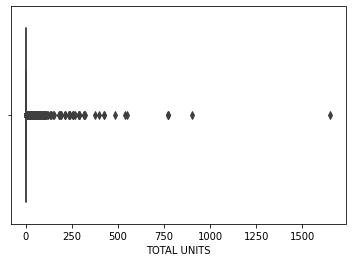

In [233]:
sns.boxplot(jualan['TOTAL UNITS'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


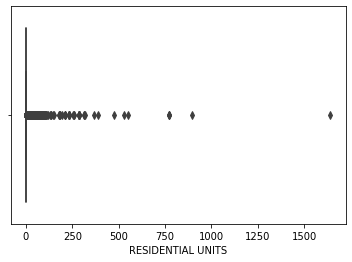

In [234]:
sns.boxplot(jualan['RESIDENTIAL UNITS'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


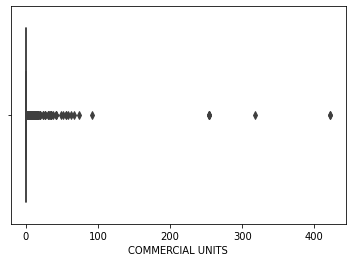

In [235]:
sns.boxplot(jualan['COMMERCIAL UNITS'])

SOME MORE DATA PREPROCESSING

In [236]:
jualan.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
BUILDING CLASS AT PRESENT          object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [237]:
jualan.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              1
BLOCK                             1
LOT                               1
BUILDING CLASS AT PRESENT         1
ZIP CODE                          1
RESIDENTIAL UNITS                 1
COMMERCIAL UNITS                  1
TOTAL UNITS                       1
LAND SQUARE FEET                  1
GROSS SQUARE FEET                 1
YEAR BUILT                        1
TAX CLASS AT TIME OF SALE         1
BUILDING CLASS AT TIME OF SALE    1
SALE PRICE                        1
SALE DATE                         1
dtype: int64

In [244]:
x=jualan.iloc[:,7:] #SELF NOTE: DATA TERAKHIR DI BARIS 18761. INI FUNGSINYA UNTUK MEMBACA DATA KE SEKIAN SECARA VERTIKAL. INI DILAKUKAN KETIKA ARRAY SESUAI URUTAN DAN BUKAN SLICING
y=jualan['TOTAL UNITS']

scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x,columns=['RESIDENTIAL UNITS'])

ValueError: ignored

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)